In [45]:
import os
import sys
import json
import glob
import h5py
import tqdm
import numpy as np
import scipy.signal
import scipy.interpolate
import scipy.io
import scipy.io.wavfile
import librosa
import librosa.display
import matlab.engine

%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd

sys.path.append('/om2/user/msaddler/python-packages/msutil')
import util_figures
import util_stimuli
import util_misc


In [2]:
eng = matlab.engine.start_matlab();
eng.addpath('HRTFs/');


In [46]:
meas_files = eng.cellstr(scipy.io.loadmat('HRTFs/file_names.mat')['gardnermartin_file'].tolist())
meas_files


['HRTFs\\elev-40\\H-40e000a.wav',
 'HRTFs\\elev-40\\H-40e006a.wav',
 'HRTFs\\elev-40\\H-40e013a.wav',
 'HRTFs\\elev-40\\H-40e019a.wav',
 'HRTFs\\elev-40\\H-40e026a.wav',
 'HRTFs\\elev-40\\H-40e032a.wav',
 'HRTFs\\elev-40\\H-40e039a.wav',
 'HRTFs\\elev-40\\H-40e045a.wav',
 'HRTFs\\elev-40\\H-40e051a.wav',
 'HRTFs\\elev-40\\H-40e058a.wav',
 'HRTFs\\elev-40\\H-40e064a.wav',
 'HRTFs\\elev-40\\H-40e071a.wav',
 'HRTFs\\elev-40\\H-40e077a.wav',
 'HRTFs\\elev-40\\H-40e084a.wav',
 'HRTFs\\elev-40\\H-40e090a.wav',
 'HRTFs\\elev-40\\H-40e096a.wav',
 'HRTFs\\elev-40\\H-40e103a.wav',
 'HRTFs\\elev-40\\H-40e109a.wav',
 'HRTFs\\elev-40\\H-40e116a.wav',
 'HRTFs\\elev-40\\H-40e122a.wav',
 'HRTFs\\elev-40\\H-40e129a.wav',
 'HRTFs\\elev-40\\H-40e135a.wav',
 'HRTFs\\elev-40\\H-40e141a.wav',
 'HRTFs\\elev-40\\H-40e148a.wav',
 'HRTFs\\elev-40\\H-40e154a.wav',
 'HRTFs\\elev-40\\H-40e161a.wav',
 'HRTFs\\elev-40\\H-40e167a.wav',
 'HRTFs\\elev-40\\H-40e174a.wav',
 'HRTFs\\elev-40\\H-40e180a.wav',
 'HRTFs\\elev-

In [55]:
def room_impulse_hrtf(
        src_loc,
        head_center,
        head_azimuth,
        walls,
        wtypes,
        meas_sym=1,
        f_samp=44100,
        c_snd=344.5,
        num_taps=22050,
        log_dist=0,
        jitter=1,
        highpass=1,
        dsply=0,
        eng=None):
    """
    """
    meas_locs = eng.load('HRTFs/data_locs.mat')['locs_gardnermartin']
    meas_files = eng.cellstr(scipy.io.loadmat('HRTFs/file_names.mat')['gardnermartin_file'].tolist())
    L = len(meas_files)
    meas_delay = (np.sqrt(np.sum(np.square(src_loc - head_center))) / c_snd) * np.ones(L)
    out = eng.room_impulse_hrtf(
        matlab.double(src_loc.reshape([1, 3]).tolist()),
        matlab.double(head_center.reshape([1, 3]).tolist()),
        matlab.double([head_azimuth]),
        meas_locs,
        meas_files,
        matlab.double(meas_delay.reshape([L, 1]).tolist()),
        matlab.double([meas_sym]),
        matlab.double(walls.reshape([1, 3]).tolist()),
        matlab.double(np.array([wtypes]).tolist()),
        matlab.double([f_samp]),
        matlab.double([c_snd]),
        matlab.double([num_taps]),
        matlab.double([log_dist]),
        matlab.double([jitter]),
        matlab.double([highpass]),
        matlab.double([dsply]))
    return out

src_loc = np.array([1, 1, 1])
head_center = np.array([3, 2, 2])
head_azimuth = 0
walls = np.array([5, 5, 5])
wtypes = 2

for _ in tqdm.tqdm(range(1)):
    x = room_impulse_hrtf(
        src_loc,
        head_center,
        head_azimuth,
        walls,
        wtypes,
        meas_sym=1,
        f_samp=44100,
        c_snd=344.5,
        num_taps=22050,
        log_dist=0,
        jitter=1,
        highpass=1,
        dsply=0,
        eng=eng)


100%|██████████| 1/1 [00:10<00:00, 10.50s/it]


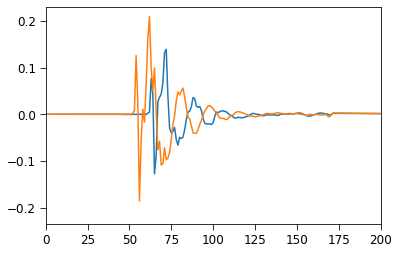

In [56]:
fig, ax = plt.subplots()
ax.plot(np.array(x)[:, 0])
ax.plot(np.array(x)[:, 1])
util_figures.format_axes(
    ax,
    xlimits=[0, 200])
plt.show()
